# Подключение библиотек

In [2]:
import numpy as np # линейная алгебра, матрицы
import pandas as pd # предобработка данных, работа с таблицами
import seaborn as sns # визуализация
import matplotlib.pyplot as plt # визуализация
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro #нормальность тест Шапиро
from sklearn.linear_model import LinearRegression
from scipy.stats import ks_2samp # тест Колмогорова-Смирнова
from sklearn.inspection import permutation_importance # интерпретация модели
from sklearn.model_selection import train_test_split, GridSearchCV # разбивка обучающей выборки и сетка гиперпараметров
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score # метрики

In [9]:
dataf = pd.read_csv('/users/allastepannikova/Downloads/Data.csv', sep=";", encoding='cp1251')
dataf

,Возраст,Пол,Образование,Семейное положение,Количество несовершеннолетних детей,Среднемесячный доход,Количество посещений за месяц,Суммарный чек за месяц
0,63,ж,высшее,в браке,2,76943,3,19385
1,28,ж,высшее,в браке,1,131837,6,9939
2,62,м,среднее,в разводе,2,60416,5,26518
3,30,ж,высшее,в браке,2,103566,3,9029
4,33,ж,высшее,в браке,2,57275,2,4000
...,...,...,...,...,...,...,...,...
264,28,ж,без образования,не в браке,0,74024,2,2056
265,28,м,высшее,в разводе,2,122995,9,15615
266,29,м,высшее,в браке,2,96791,9,4470
267,65,м,среднее,в разводе,2,117651,10,30958


In [8]:
data = load_boston()
dir(data)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [14]:
dataf = pd.DataFrame(data=data.data, columns= data.feature_names)
dataf['PRICE'] = data.target

In [15]:
dataf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
pd.isnull(dataf).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [18]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


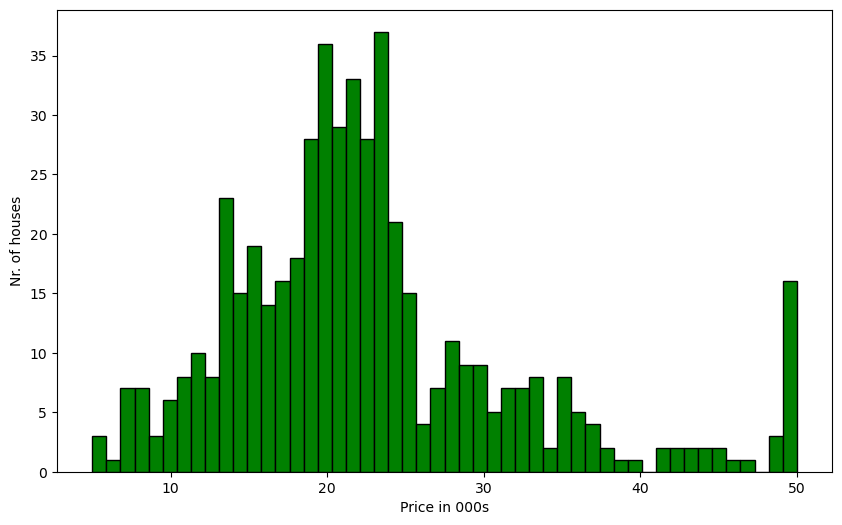

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(dataf['PRICE'], bins=50, ec='black', color='green')
plt.xlabel("Price in 000s")
plt.ylabel("Nr. of houses")
plt.show()

In [26]:
shapiro(dataf['PRICE'])

ShapiroResult(statistic=0.9369055032730103, pvalue=8.285112504911873e-14)

In [27]:
dataf.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


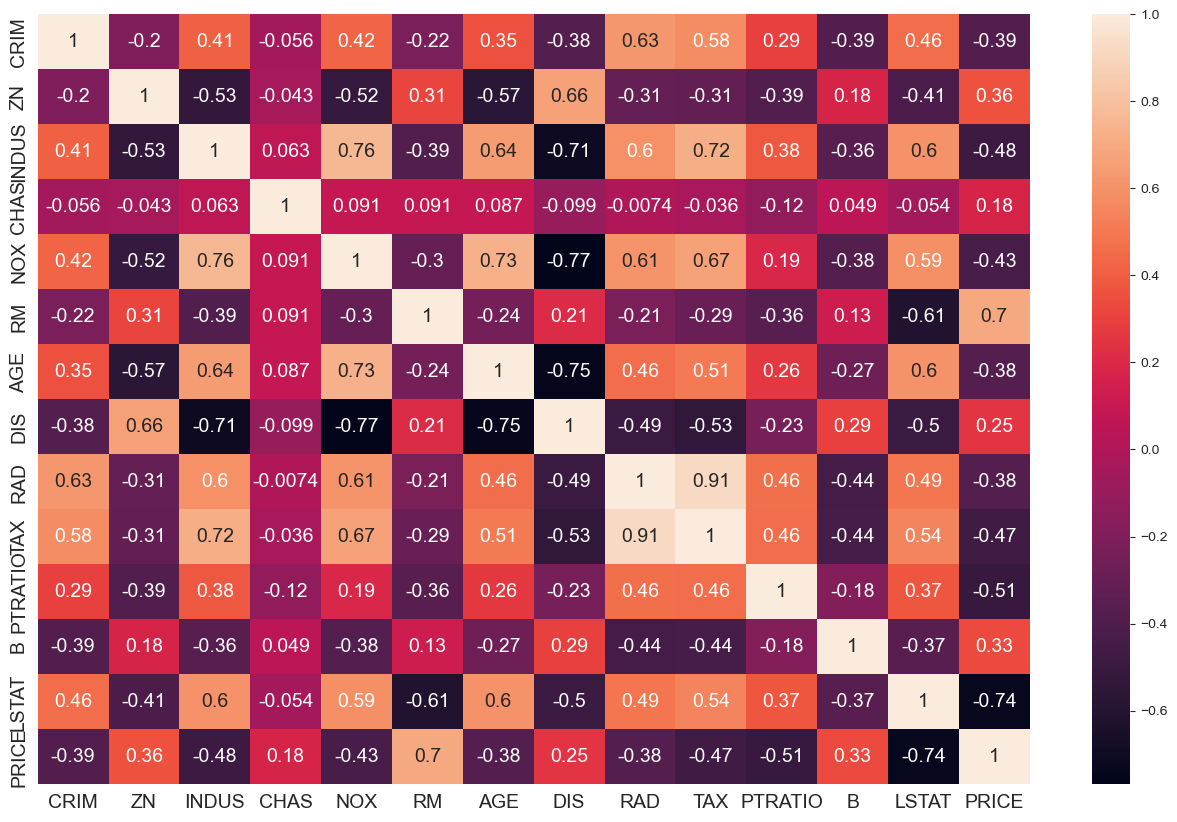

In [31]:
plt.figure(figsize=(16,10))
sns.heatmap(dataf.corr(), annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

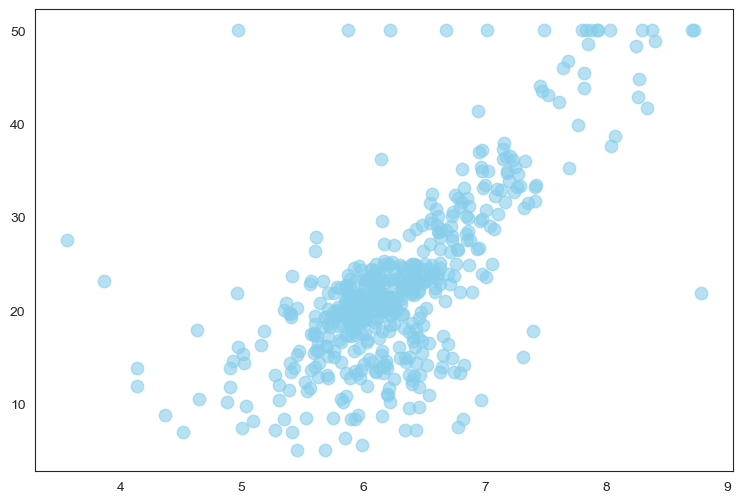

In [34]:
plt.figure(figsize=(9, 6))
plt.scatter(x=dataf['RM'], y=dataf['PRICE'], alpha=0.6, s=80, color='skyblue')
plt.show()

In [35]:
prices = dataf['PRICE']
features=dataf.drop('PRICE', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

In [42]:
regres = LinearRegression()
regres.fit(x_train, y_train)

print('Train r-squared:', regres.score(x_train, y_train))
print('Test r-squared:', regres.score(x_test, y_test))
print('B0:', regres.intercept_)
pd.DataFrame(data=regres.coef_, index=x_train.columns, columns=['coef'])

Train r-squared: 0.750121534530608
Test r-squared: 0.6709339839115628
B0: 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [43]:
y_log=np.log(dataf['PRICE'])

/Users/tatanakiseleva/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

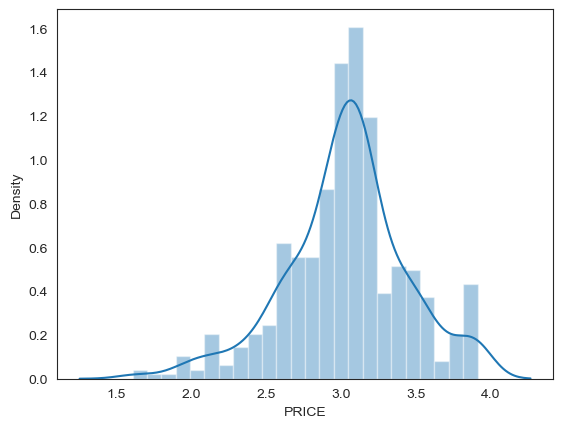

In [46]:
sns.distplot(y_log)

In [62]:
x_const=sm.add_constant(x_train)
model = sm.OLS(y_train, x_const)
res = model.fit()

pd.DataFrame({'coef':res.params, 'p-value': round(res.pvalues, 3)})

TypeError: 'dict' object is not callable

In [61]:
vif=[variance_inflation_factor(exog=x_const.values, exog_idx=i) for i in range(x_const.shape[1])]

pd.DataFrame({'coef': x_const.columns, 'vif': np.around(vif, 2)})

{'coef': Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
        'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
       dtype='object'),
 'vif': array([597.55,   1.71,   2.33,   3.94,   1.08,   4.41,   1.84,   3.33,
          4.22,   7.31,   8.51,   1.84,   1.34,   2.81])}